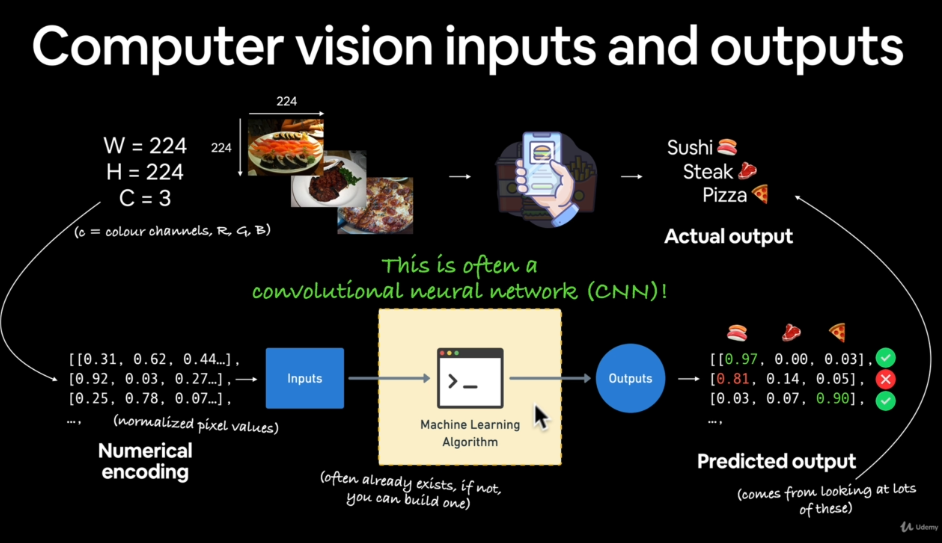

# What is CNN?


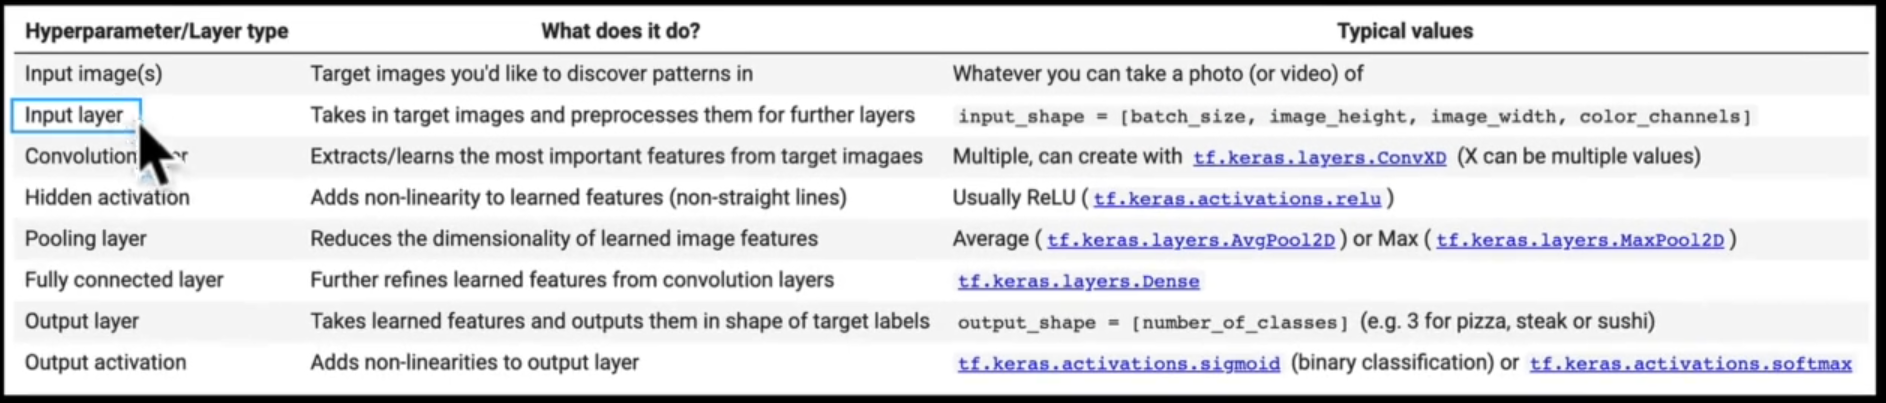

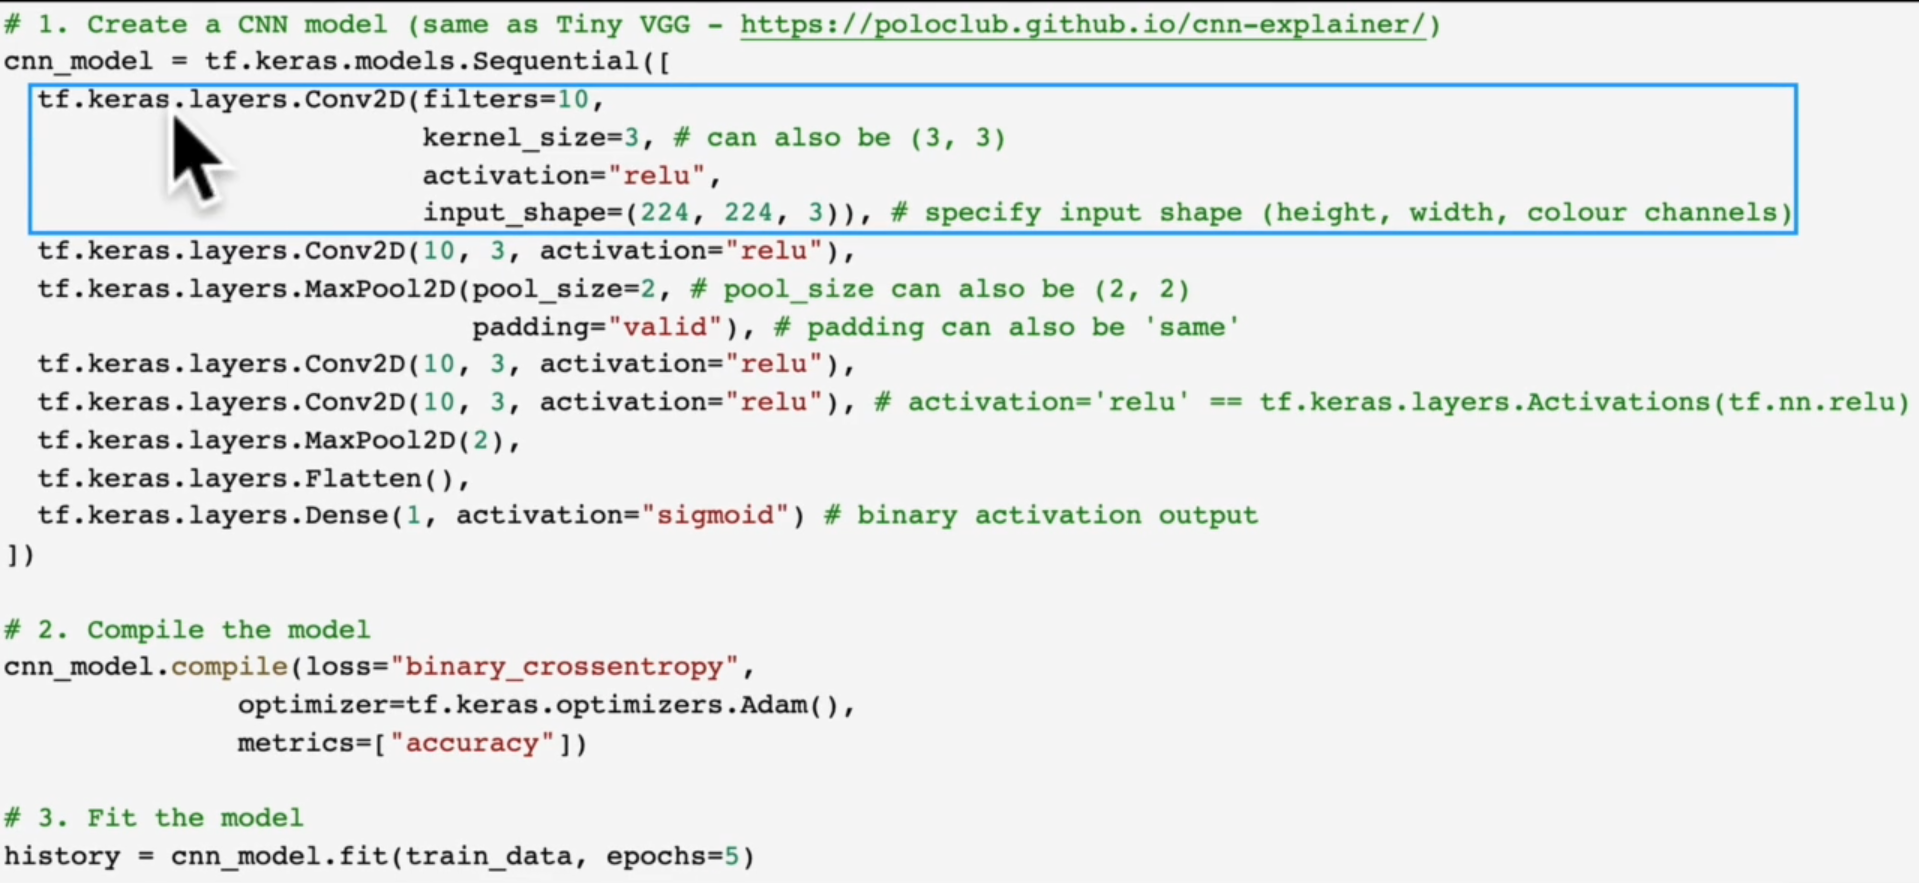

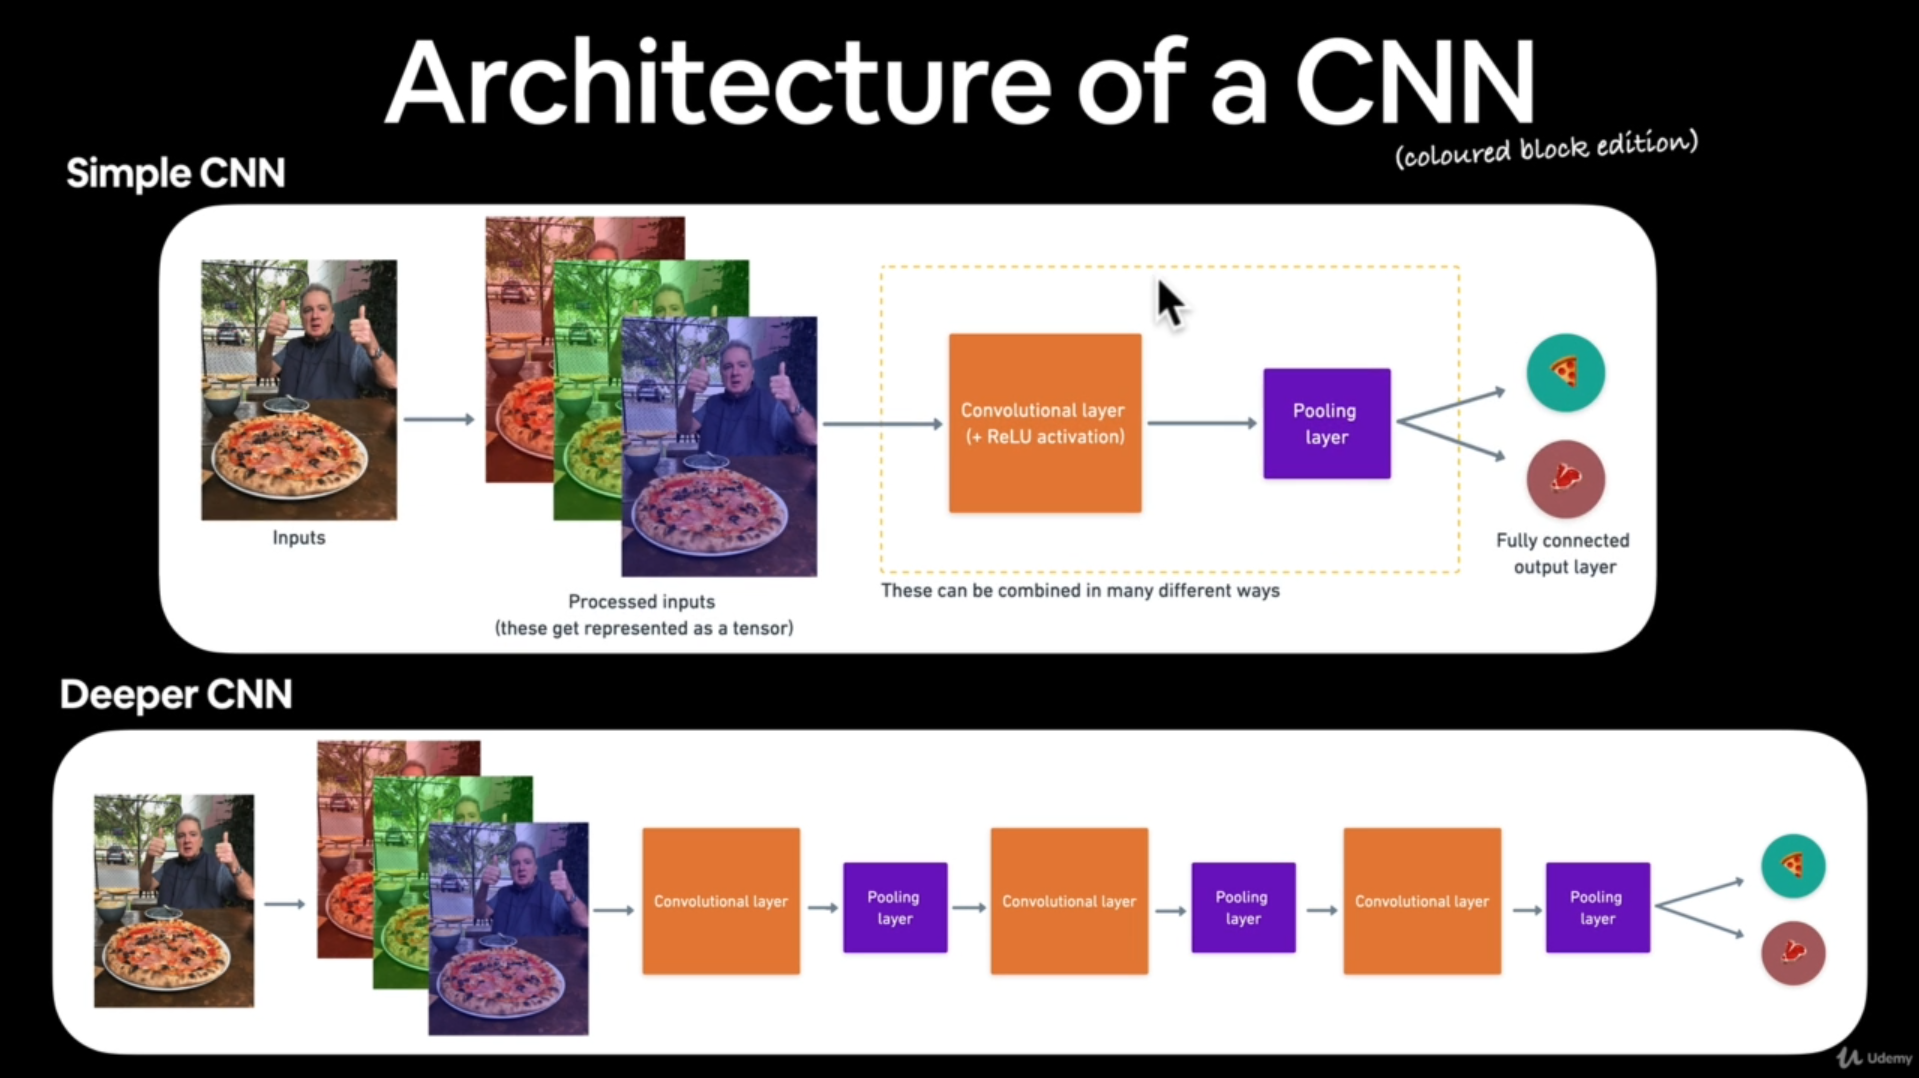

In [ ]:
!cp -r /content/drive/MyDrive/pizza_steak  /content/Data

In [ ]:
# We got the data from Kaggle Food 101 but only 2 classes not whole

## Inspect the data now
 Become one with the data means visualize the data as um as possible


In [1]:
import os

# Walk through pizza steak data directory and list no of files
for dirpath, dirnames, filenames in os.walk('data/pizza_steak'):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

there are 2 directories and 0 images in data/pizza_steak.
there are 2 directories and 0 images in data/pizza_steak\test.
there are 0 directories and 250 images in data/pizza_steak\test\pizza.
there are 0 directories and 250 images in data/pizza_steak\test\steak.
there are 2 directories and 0 images in data/pizza_steak\train.
there are 0 directories and 750 images in data/pizza_steak\train\pizza.
there are 0 directories and 750 images in data/pizza_steak\train\steak.


In [2]:
# Another way to find out the no of images in our directory
num_steak_image_train = len(os.listdir('data/pizza_steak/train/steak'))
num_steak_image_test = len(os.listdir('data/pizza_steak/test/steak'))

num_pizza_image_train = len(os.listdir('data/pizza_steak/train/pizza'))
num_pizza_image_test = len(os.listdir('data/pizza_steak/test/pizza'))

print(num_steak_image_train,
      num_steak_image_test,
      num_pizza_image_train,
      num_pizza_image_test)

750 250 750 250


### To visualize our images, first lets get the class names programmatically

In [3]:
# Get the class names programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path('data/pizza_steak/train')

# Lets create a list of class anmes from the sub directories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['pizza' 'steak']


In [7]:
# Lets visualise the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  # Set up the target dir
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape: {img.shape}")
  return img


['2035248.jpg']
Image shape: (512, 512, 3)


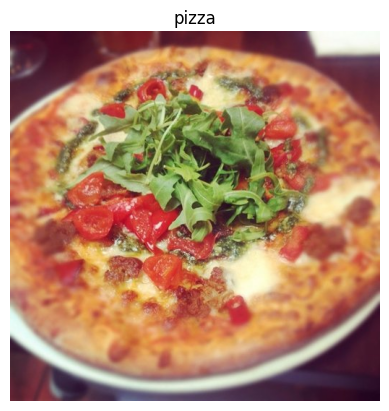

In [8]:
img = view_random_image('data/pizza_steak/train/', 'pizza')

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(341, 512, 3), dtype=uint8, numpy=
array([[[ 78,  76,  64],
        [ 86,  84,  72],
        [ 85,  82,  73],
        ...,
        [140, 146, 144],
        [138, 147, 144],
        [139, 148, 145]],

       [[ 89,  87,  75],
        [ 96,  94,  82],
        [ 93,  90,  81],
        ...,
        [142, 148, 146],
        [140, 149, 146],
        [140, 149, 146]],

       [[ 96,  96,  84],
        [103, 103,  91],
        [101,  98,  89],
        ...,
        [144, 150, 146],
        [142, 151, 146],
        [142, 151, 146]],

       ...,

       [[214, 175, 146],
        [217, 178, 149],
        [218, 178, 152],
        ...,
        [ 10,  22,  12],
        [  9,  20,  12],
        [  9,  20,  12]],

       [[216, 177, 148],
        [217, 178, 149],
        [216, 176, 150],
        ...,
        [ 10,  22,  12],
        [  9,  20,  12],
        [  9,  20,  12]],

       [[221, 182, 153],
        [219, 180, 151],
        [216, 176, 150],
        ...,
        [ 11,  23,  1

In [7]:
# Get the shape of the img
img.shape


(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 and 1
img/255.0

array([[[0.52156863, 0.44313725, 0.31372549],
        [0.52156863, 0.44313725, 0.31372549],
        [0.52156863, 0.44313725, 0.31372549],
        ...,
        [0.58823529, 0.50588235, 0.43137255],
        [0.59607843, 0.51372549, 0.43921569],
        [0.60392157, 0.52156863, 0.44705882]],

       [[0.51372549, 0.43921569, 0.30980392],
        [0.51372549, 0.43921569, 0.30980392],
        [0.51372549, 0.43921569, 0.30980392],
        ...,
        [0.58431373, 0.50196078, 0.41960784],
        [0.59215686, 0.50980392, 0.42745098],
        [0.59607843, 0.51372549, 0.43137255]],

       [[0.50980392, 0.44705882, 0.31764706],
        [0.50980392, 0.44705882, 0.31764706],
        [0.50980392, 0.44705882, 0.31764706],
        ...,
        [0.58431373, 0.50588235, 0.40784314],
        [0.58823529, 0.50980392, 0.41176471],
        [0.59215686, 0.51372549, 0.41568627]],

       ...,

       [[0.29411765, 0.23137255, 0.12941176],
        [0.29411765, 0.23137255, 0.12941176],
        [0.29411765, 0

# Building an end to end architecture of CNN
Lets build a CNN model to find the patterns in our images, more specifically we need a way to:
* Load our image
* Preprocess image
* Build a CNN to find patter
* Compile the CNN
* Fir the CNN to training data

In [2]:
!cp -r /content/drive/MyDrive/pizza_steak /content/data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess the image
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up the path to our data directories
train_dir = 'data/pizza_steak/train'
test_dir = 'data/pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42
                                               )

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42
                                               )


# Build a CNN model (same as the tiny VGG on the CNN explainer website (img at very starting))

model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = 'relu',
        input_shape = (224, 224, 3)), # 3 is color channels here
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])


# Compile our CNN
model1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)



# Fit the model
# history1 = model1.fit(train_data, # The train data here creates both features and label as we have done above
#                       epochs = 5,
#                       steps_per_epoch = len(train_data),
#                       validation_data = valid_data,
#                       validation_steps = len(valid_data))

history1 = model1.fit(train_data, epochs=5, steps_per_epoch=len(train_data))





Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 408ms/step - accuracy: 0.5573 - loss: 0.7237
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 402ms/step - accuracy: 0.7796 - loss: 0.4785
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 379ms/step - accuracy: 0.7963 - loss: 0.4490


<Axes: >

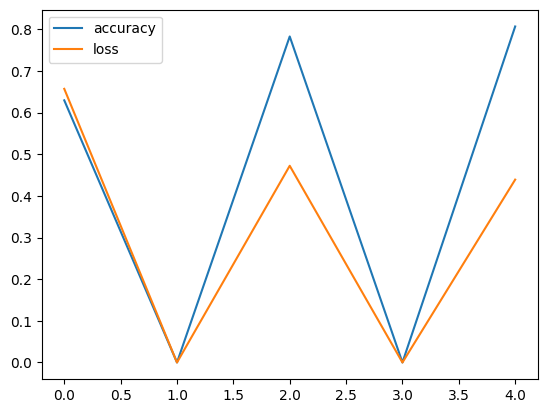

In [13]:
import pandas as pd
pd.DataFrame(history1.history).plot()

In [14]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

### Create a model we studied in prev section to see if that works with image data or not

In [15]:
# Set the random_seed
tf.random.set_seed(42)

# Create the mdel
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)


history2 = model2.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.4998 - loss: 0.7175
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.4974 - loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.5194 - loss: 0.6931


<Axes: >

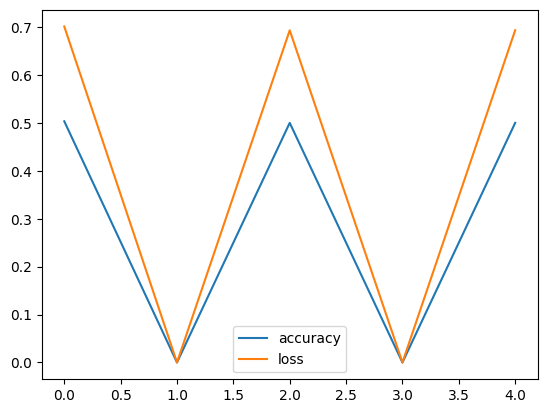

In [16]:
pd.DataFrame(history2.history).plot()

### Lets improve the model2

In [18]:
# Set the random_seed
tf.random.set_seed(42)

# Create the mdel
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)


history3 = model3.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = len(train_data)
)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.4672 - loss: 8.6943
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 80us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.5177 - loss: 0.6926
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 141us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.4769 - loss: 0.6946
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 153us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.4817 - loss: 0.6934
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 111us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.4981 - loss: 0.6932
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 127us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


<Axes: >

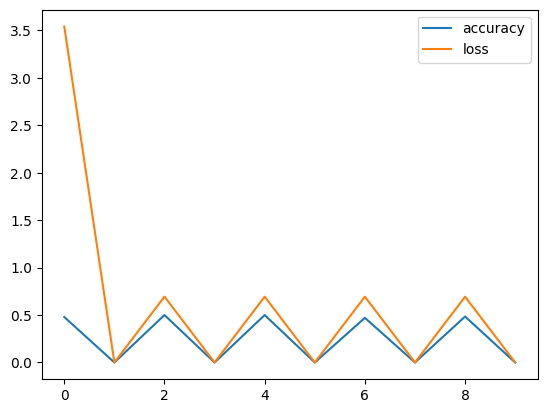

In [19]:
pd.DataFrame(history3.history).plot()

In [20]:
model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │     1,204,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,613,157 (13.78 MB)

 Trainable params: 1,204,385 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,408,772 (9.19 MB)

# Let's break it down
Break down all the stpes used here
1. Become one with data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust diff parameters to improve the mode
7. Repeat until satisfied


## Become one with data

['1598885.jpg']
Image shape: (511, 512, 3)
['3173779.jpg']
Image shape: (512, 512, 3)


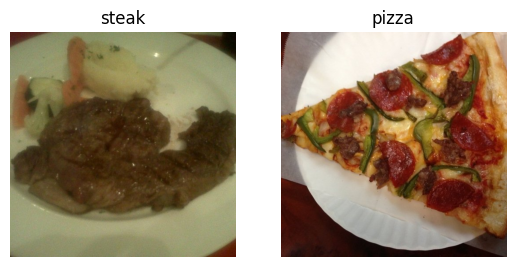

In [15]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('data/pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('data/pizza_steak/train/', 'pizza')

## Preprocess the data

In [16]:
# Split data into training and testing
train_dir = 'data/pizza_steak/train/'
test_dir = 'data/pizza_steak/test/'


Turn the data into **batches**
* Batch is a small subset of data, rather than using all data at once we use 32 img at a time

Reasons:
1. All img at once may not fit into the memory of our processor (GPU)
2. Trying the model to learn pattern in while data in one hit could result in the model not being able to learn very well.


In [17]:
!nvidia-smi

Sat Nov 16 16:44:42 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.09                 Driver Version: 561.09         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8              2W /   85W |     128MiB /   4096MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [18]:
# Lets create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


In [19]:
# Load in our img data from dir and turn them into batches
train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224), # Target size of the img
    batch_size = 32,
    class_mode = 'binary' # Type of data binary, categorical etc
)

test_data = train_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)



Found 1500 images belonging to 2 classes.


Found 500 images belonging to 2 classes.


In [20]:
# Get a sample of training data batch
images, labels = next(train_data)
len(images), len(labels)

(32, 32)

In [21]:
# How many batches are there
len(train_data)

47

In [22]:
images[1], images[1].shape

(array([[[0.10980393, 0.09411766, 0.09803922],
         [0.09411766, 0.07450981, 0.09019608],
         [0.09411766, 0.07450981, 0.09803922],
         ...,
         [0.11764707, 0.04313726, 0.06666667],
         [0.1254902 , 0.0509804 , 0.07450981],
         [0.12156864, 0.04705883, 0.07058824]],
 
        [[0.09411766, 0.07843138, 0.08235294],
         [0.09019608, 0.07058824, 0.08627451],
         [0.08627451, 0.06666667, 0.09019608],
         ...,
         [0.12156864, 0.04705883, 0.07058824],
         [0.1254902 , 0.0509804 , 0.07450981],
         [0.1254902 , 0.0509804 , 0.07450981]],
 
        [[0.11764707, 0.09411766, 0.10196079],
         [0.10980393, 0.08627451, 0.10196079],
         [0.09803922, 0.07058824, 0.09803922],
         ...,
         [0.1137255 , 0.04705883, 0.07058824],
         [0.11764707, 0.0509804 , 0.07450981],
         [0.11764707, 0.0509804 , 0.07450981]],
 
        ...,
 
        [[0.21176472, 0.09803922, 0.11764707],
         [0.27450982, 0.13725491, 0.16078

In [23]:
images[9].shape

(224, 224, 3)

In [24]:
# View the first batch of labels
labels

array([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.],
      dtype=float32)

## Create a baseline CNN model

> Baseline model is a simple model that we create at first and then we improve it over time
> In deep learning, there are infinite no of architecture you can use then we can increase the complexity as required

In [25]:
# Making the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam 


In [26]:
# Create the model

model4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           activation = 'relu',
           input_shape = (224, 224, 3)), # Input layer
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid') # Output layer
])

model4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

# model4.fit(train_data,
#            epochs = 5,
#            steps_per_epoch = len(train_data),
#            )

C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

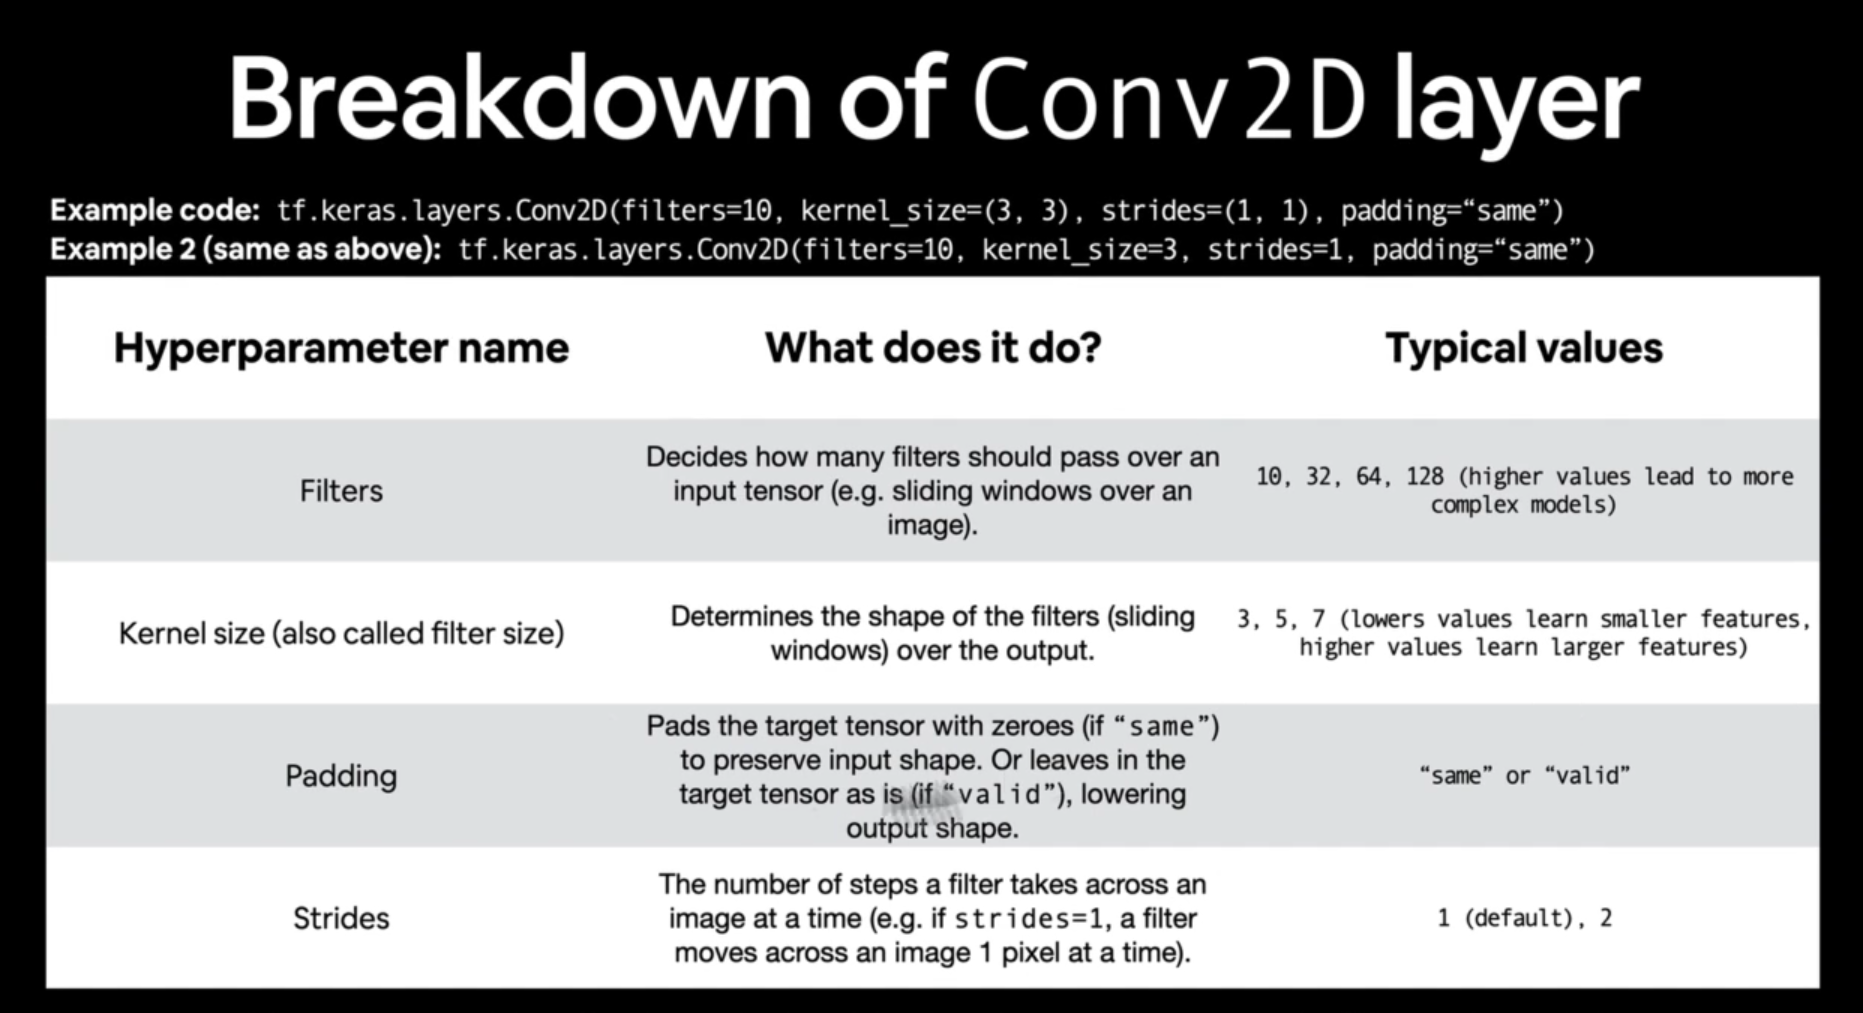

In [28]:
# model4.evaluate(test_data)

In [29]:
# Correct `validation_steps`
validation_steps = test_data.samples // test_data.batch_size

history4 = model4.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = validation_steps
           )

Epoch 1/5


C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 706ms/step - accuracy: 0.6296 - loss: 0.9542 - val_accuracy: 0.8417 - val_loss: 0.3790
Epoch 2/5


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.5335
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 610ms/step - accuracy: 0.8393 - loss: 0.4037 - val_accuracy: 0.7750 - val_loss: 0.4445
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7000 - val_loss: 0.4750
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 560ms/step - accuracy: 0.8746 - loss: 0.3267 - val_accuracy: 0.8313 - val_loss: 0.3674


In [17]:
model4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.8144 - loss: 0.3705


[0.384378045797348, 0.8080000281333923]


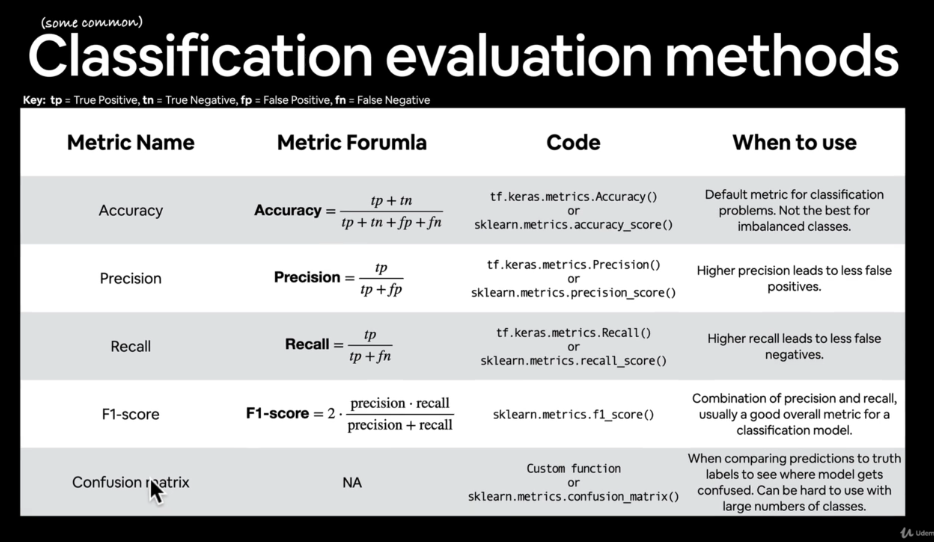

<Axes: >

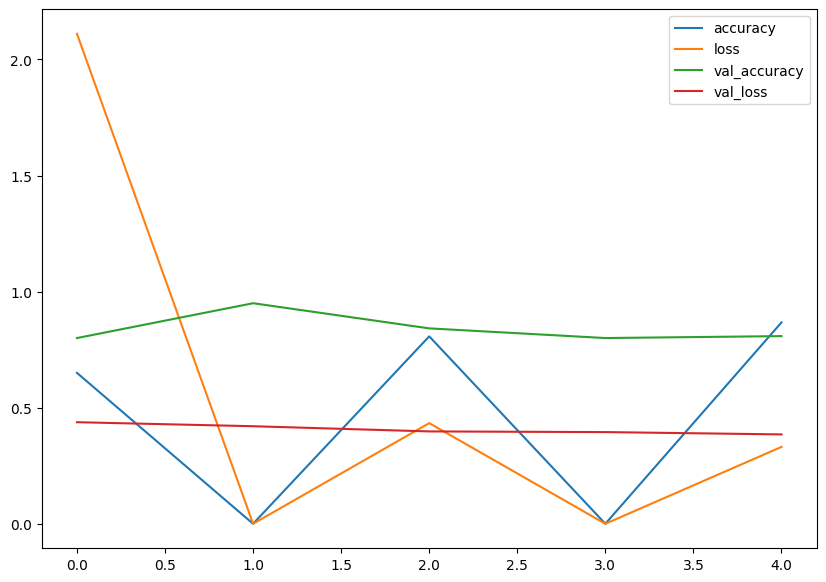

In [19]:
import pandas as pd
pd.DataFrame(history4.history).plot(figsize=(10,7))

In [31]:
import matplotlib.pyplot as plt
def plot_loss_curve(history):
    """
    Returns seperate loss curve for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss'])) #how many epochs did we run for
    
    # plot the loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot the accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    
    

> **Note:** When a models val loss starts to increase , its likely that the model is **overfitting** the training dataset. This means, its learning the patterns in the training dataset too well and thus models ability to generalize to unseen data will be diminished.

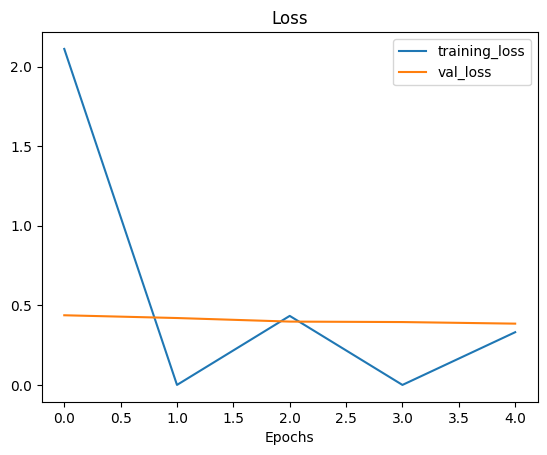

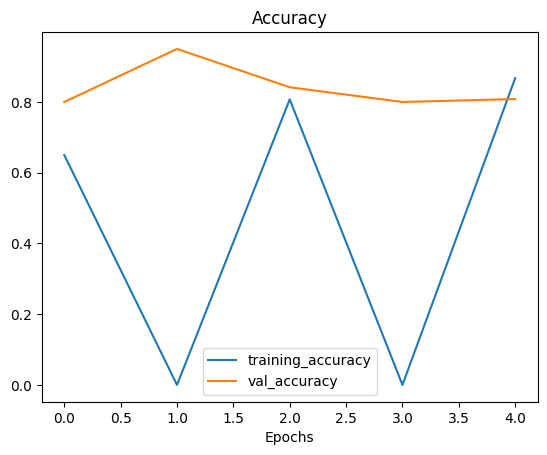

In [24]:
# Check out the loss and accuracy curves
plot_loss_curve(history4)

### Adjust the model parameter
Fitting a ML model comes in 3 steps
1. Create a baseline model
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways:
* Increase the no of conv layer
* Increase the no of conv filter
* Add another dense layer to output of our flattened data

Reduce overfitting:
* Add data augmentation
* Add reularization layers (such as MaxPool2D)
* Add more data...

> Reducing overfitting is also called **Regularization**

In [135]:
model5 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [136]:
model5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [137]:

validation_steps = test_data.samples // test_data.batch_size

history5 = model5.fit(train_data,
              epochs = 5,
              steps_per_epoch = len(train_data),
              validation_data = test_data,
              validation_steps = validation_steps
              )

Epoch 1/5


C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 433ms/step - accuracy: 0.4945 - loss: 0.9306 - val_accuracy: 0.5542 - val_loss: 0.6900
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.6896
Epoch 3/5


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 468ms/step - accuracy: 0.5417 - loss: 0.6906 - val_accuracy: 0.5000 - val_loss: 1.0939
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.1632
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 496ms/step - accuracy: 0.5607 - loss: 0.8655 - val_accuracy: 0.6375 - val_loss: 0.6832


In [138]:
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [139]:
model5.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.6514 - loss: 0.6836


[0.6829140782356262, 0.6380000114440918]

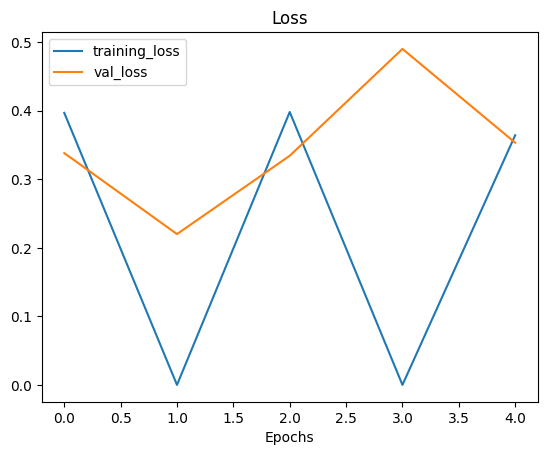

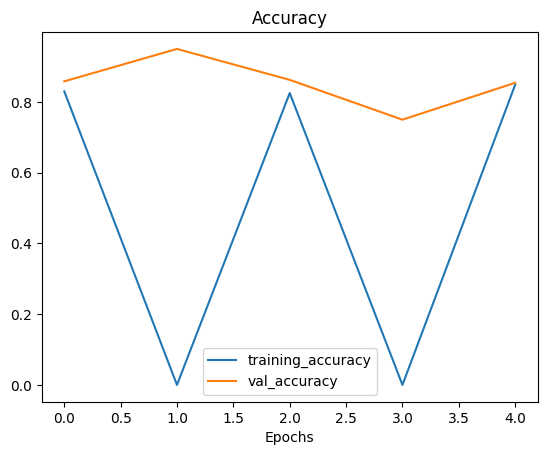

In [35]:
plot_loss_curve(history5)

In [53]:
# Lets do data data augmentation
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)



# For test data
test_datagen = ImageDataGenerator(rescale = 1/255.)

## What exactly is Data Augmentation
Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our model to learn more generalizable patterns. Altering might mean adjusting the rotation, flipping img, cropping or something similar


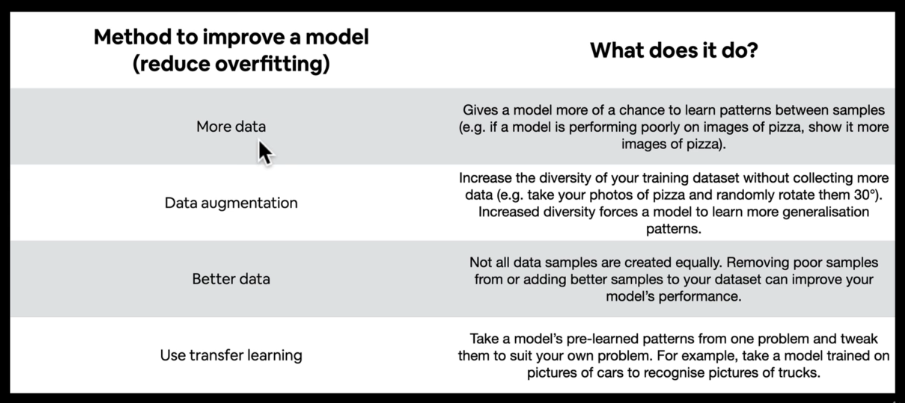

In [54]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = False # for demonstration purposes only
)

# Create non augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = False # for demonstration purposes only
)


# Non-aug test data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)



Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**Augmentation is usually only performed on training data**

Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model

> Let's visualize some augmented data

In [55]:
# Get sample of augmented data
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)



Showing image no: 12


(-0.5, 223.5, 223.5, -0.5)

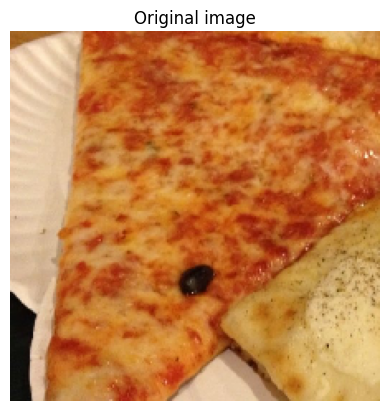

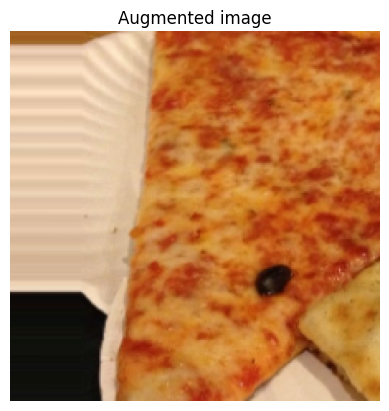

In [76]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # we have 32 batches
print(f"Showing image no: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)


In [78]:
# Lets create the model

model6 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = tf.keras.activations.relu,
        input_shape = (224, 224, 3)
    ),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(
        pool_size = 2,
        padding = 'valid'
    ),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [80]:
Validation_steps = test_data.samples // test_data.batch_size

history6 = model6.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = Validation_steps
)

Epoch 1/5


C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 662ms/step - accuracy: 0.4672 - loss: 0.7322 - val_accuracy: 0.5583 - val_loss: 0.6864
Epoch 2/5


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.6885
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 617ms/step - accuracy: 0.4714 - loss: 0.6960 - val_accuracy: 0.6313 - val_loss: 0.6602
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5500 - val_loss: 0.6513
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 603ms/step - accuracy: 0.5869 - loss: 0.7216 - val_accuracy: 0.5021 - val_loss: 0.6818


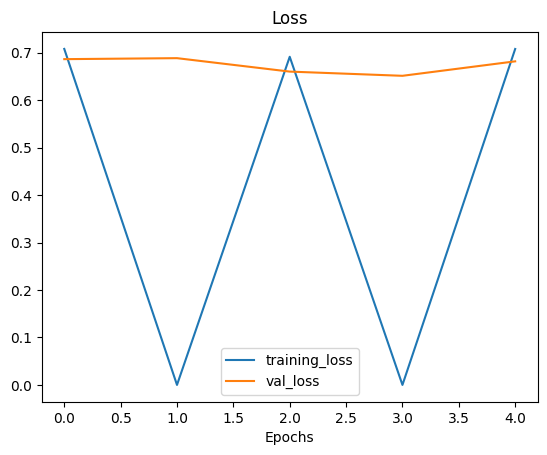

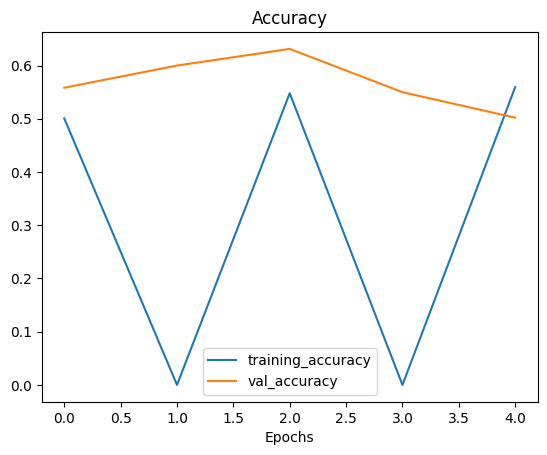

In [83]:
plot_loss_curve(history6)

In [84]:
model6.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [85]:
model6.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.4985 - loss: 0.6817


[0.6787812113761902, 0.5080000162124634]

<Axes: >

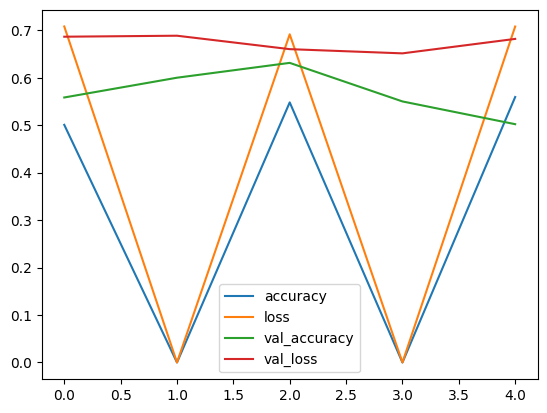

In [86]:
pd.DataFrame(history6.history).plot()

Lets shuffle the data then train again, as previously we were not shuffling as we were experimenting

In [87]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True
)



Found 1500 images belonging to 2 classes.


In [89]:
model7 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

history7 = model7.fit(
    train_data_augmented_shuffled,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented_shuffled),
    validation_data = test_data,
    validation_steps = Validation_steps
)

C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 475ms/step - accuracy: 0.5509 - loss: 0.6753 - val_accuracy: 0.6958 - val_loss: 0.5800
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.5728
Epoch 3/5


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 493ms/step - accuracy: 0.6881 - loss: 0.5752 - val_accuracy: 0.7854 - val_loss: 0.4424
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.4677
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 502ms/step - accuracy: 0.7182 - loss: 0.5698 - val_accuracy: 0.8396 - val_loss: 0.3799


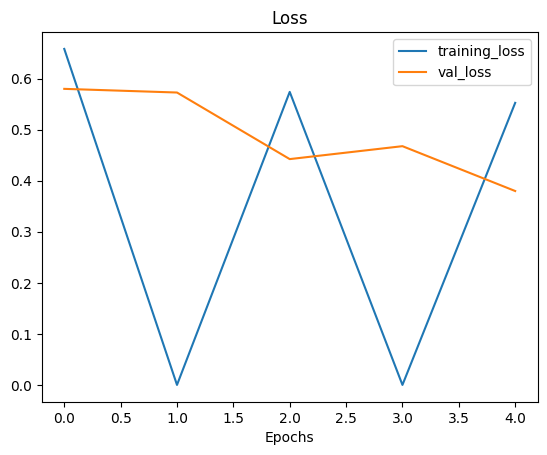

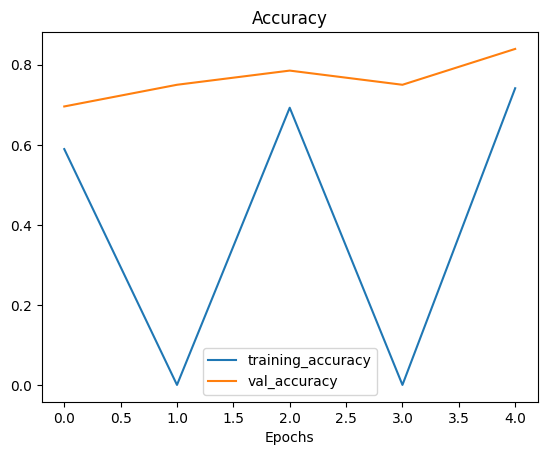

In [90]:
plot_loss_curve(history7)

In [91]:
model7.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [92]:
model7.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.8568 - loss: 0.3708


[0.38639315962791443, 0.8339999914169312]

### Repeat until satisfied
* Increase the `Conv2D` or `MaxPool2D` layers
* Increase no of filters in each layer (10, 32, 64)
* Train for longer
* Finding the ideal learning rate
* Get more data
* Use **Transfer Learning** (Finetuning)


## Making a prediction with our trained model on our custom data

In [93]:
# Classes
print(class_names)

['pizza' 'steak']


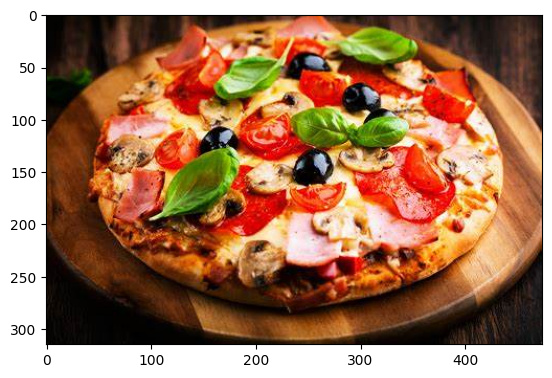

In [ ]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt


pizza_img = 'test_images/01_pizza.jpeg'
pizza = mpimg.imread(pizza_img)
plt.imshow(pizza)


In [102]:
import tensorflow as tf

import matplotlib.image as mpimg 
import matplotlib.pyplot as plt


def result(img_loc, model):

    item_img = img_loc
    item = mpimg.imread(item_img)
    item_resized = tf.image.resize(item, (224, 224))
    item_normalized = item_resized / 255.0
    item_normalized = tf.cast(item_normalized, tf.float32)
    item_batched = tf.expand_dims(item_normalized, axis=0)
    predictions = model.predict(item_batched)
    # print(predictions)
    # print(class_names[int(tf.round(predictions).numpy())])
    return item_normalized
    
# result('test_images/04_steak.jpeg', model7)
# result('test_images/03_steak.jpeg', model6)
# result('test_images/03_steak.jpeg', model5)

In [167]:
model7.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.8416 - loss: 0.3792


[0.38639312982559204, 0.8339999914169312]

In [176]:
def pred_plot(model, file, class_names = class_names):
    item = result(file, model)
    item_batched = tf.expand_dims(item, axis=0)
    predictions = model.predict(item_batched)
    plt.imshow(item)
    plt.title('The image contains: '+class_names[int(tf.round(predictions).numpy())])
    plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


C:\Users\anura\AppData\Local\Temp\ipykernel_16212\2550469694.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('The image contains: '+class_names[int(tf.round(predictions).numpy())])


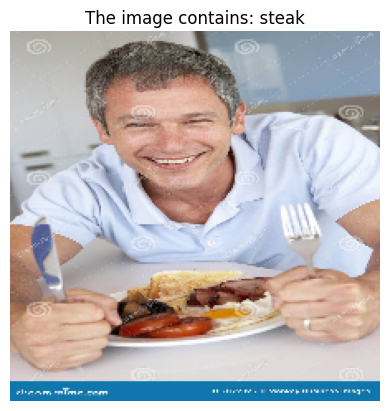

In [177]:
pred_plot(model7, 'test_images/06_steak.jpeg')

# Multiclass Image classification

1. Become one with data
2. Preprocess the data (get it ready for model)
3. Create a baseline model
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust the hyperparameter and try beat baseline and overfitting
7. Repeat untill satisfied

We will deal with 10 class data

In [ ]:
# Import and become one with data
import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import os

# walk through 10 classes of data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data\test
There are 0 directories and 250 images in 10_food_classes_all_data\test\chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data\test\chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data\test\fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data\test\grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data\test\hamburger
There are 0 directories and 250 images in 10_food_classes_all_data\test\ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data\test\pizza
There are 0 directories and 250 images in 10_food_classes_all_data\test\ramen
There are 0 directories and 250 images in 10_food_classes_all_data\test\steak
There are 0 directories and 250 images in 10_food_classes_all_data\test\sushi
There are 10 directories and 0 images in 10_fo

### 1. Become one with the data

In [3]:
# Lets setup the train and test directories
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

In [4]:
# Lets get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [9]:
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3871666.jpg']
Image shape: (512, 512, 3)


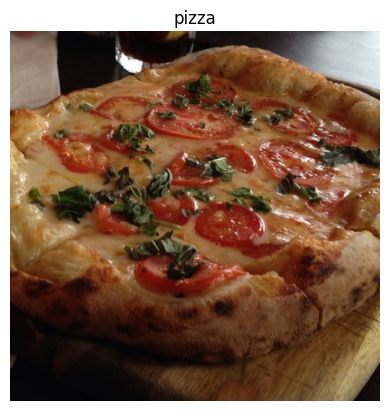

In [30]:
# Visualize the data
import random
img = view_random_image(train_dir + '/', random.choice(class_names))

### 2. Preprocessing the data

In [35]:
# Lets preprocess the data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [36]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a baseline model

In [39]:
# Making the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam 


In [45]:
model8 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        padding =  'valid',
        activation = 'relu',
        input_shape = (224, 224, 3)
    ),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation='softmax')
])


model8.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)


C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model8.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,920 (1.08 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Fit the model

In [72]:
validation_steps = test_data.samples // test_data.batch_size

history8 = model8.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = validation_steps
)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 403ms/step - accuracy: 0.5129 - loss: 1.4707 - val_accuracy: 0.3413 - val_loss: 1.9873
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 1.7031
Epoch 3/5


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 339ms/step - accuracy: 0.7153 - loss: 0.9038 - val_accuracy: 0.3041 - val_loss: 2.3258
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 100us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 1.5628
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 350ms/step - accuracy: 0.9086 - loss: 0.3448 - val_accuracy: 0.2877 - val_loss: 3.5644


In [73]:
# Lets visualise the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  # Set up the target dir
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")
  return img


### 5. Evaluate the model

In [74]:
model8.evaluate(test_data)


79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - accuracy: 0.3114 - loss: 3.4240


[3.568439483642578, 0.28760001063346863]

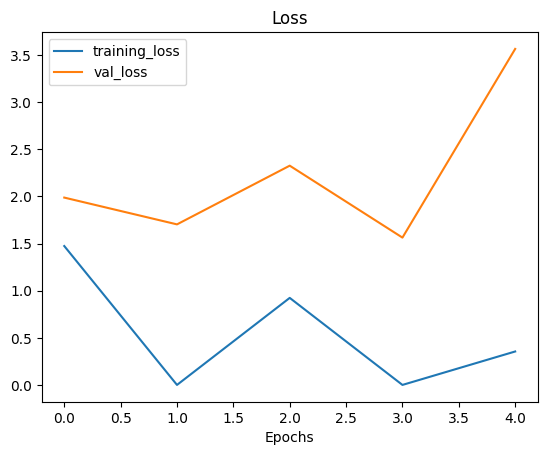

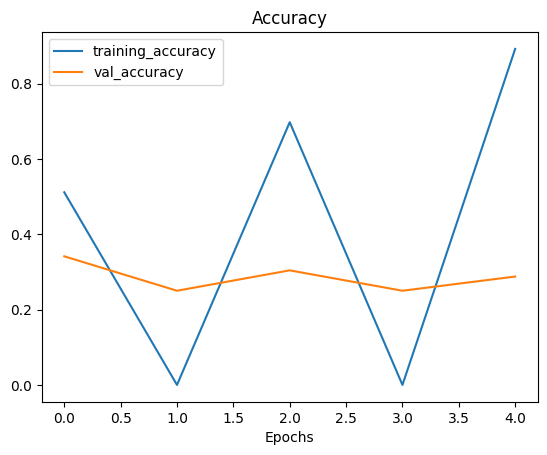

In [76]:
plot_loss_curve(history8)

<Axes: >

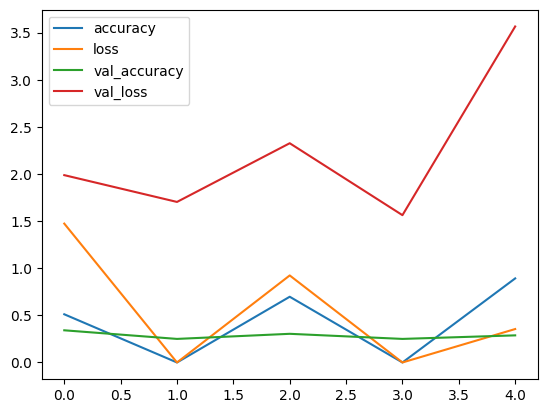

In [79]:
pd.DataFrame(history8.history).plot()

### 6. Adjust the models hyperparameter (to beat baseline model/reduce overfitting)

Lets try and fix overfitting
* `Get more data`
* `simplify model` : one way is to reduce layer or no of hidden units
* `Data Augmentation`
* `Use Transfer Learning`

Lets try and simplify our model

In [81]:
model9 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model9.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history9 = model9.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = validation_steps
)
    

C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 70s 288ms/step - accuracy: 0.1735 - loss: 2.2554 - val_accuracy: 0.3377 - val_loss: 1.9021
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.5210
Epoch 3/5


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


235/235 ━━━━━━━━━━━━━━━━━━━━ 71s 297ms/step - accuracy: 0.3974 - loss: 1.7925 - val_accuracy: 0.3433 - val_loss: 1.8972
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 91us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.5357
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 59s 249ms/step - accuracy: 0.4971 - loss: 1.5101 - val_accuracy: 0.3522 - val_loss: 1.8774


In [82]:
model9.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │       291,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 878,402 (3.35 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 585,602 (2.23 MB)

In [94]:
model9.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.3347 - loss: 1.9236


[1.876206636428833, 0.352400004863739]

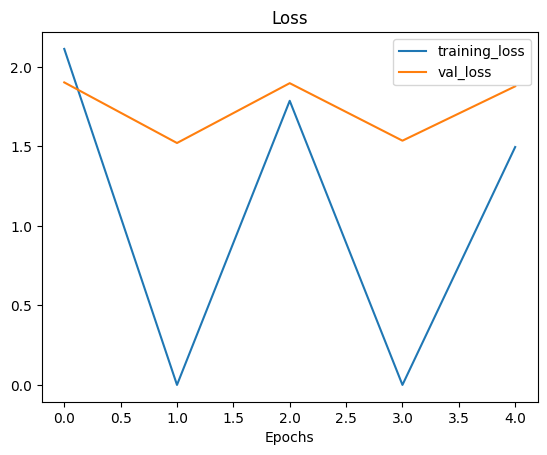

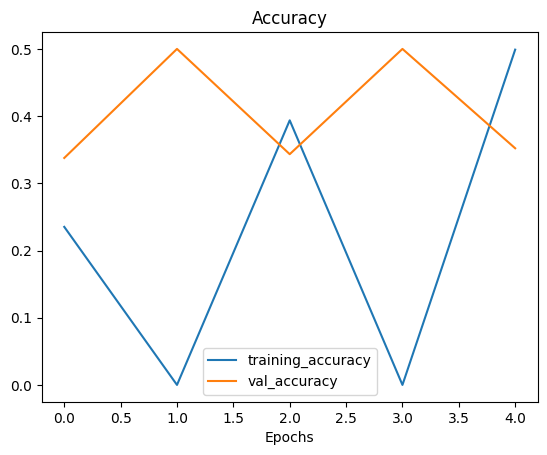

In [83]:
plot_loss_curve(history9)

<Axes: >

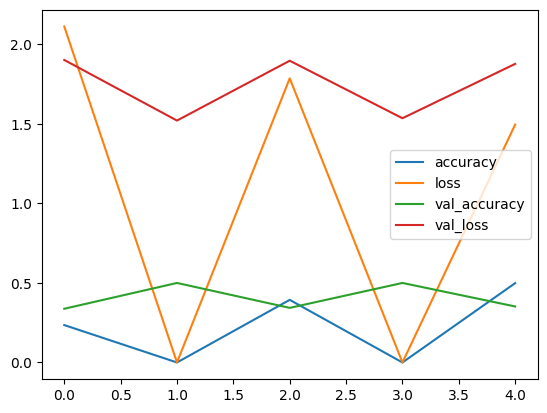

In [84]:
pd.DataFrame(history9.history).plot()

### Reducing overfitting with Data Augmentation

In [85]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
)

test_datagen = ImageDataGenerator(rescale = 1/255.)


In [88]:
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [89]:
model10 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model10.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
model10.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        67,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,710 (272.30 KB)

 Trainable params: 69,710 (272.30 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
history10 = model10.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = test_data.samples // test_data.batch_size
)

Epoch 1/5


C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 115s 472ms/step - accuracy: 0.1704 - loss: 2.2316 - val_accuracy: 0.2668 - val_loss: 2.0316
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 2.0110
Epoch 3/5


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


235/235 ━━━━━━━━━━━━━━━━━━━━ 112s 467ms/step - accuracy: 0.2590 - loss: 2.0626 - val_accuracy: 0.3393 - val_loss: 1.9279
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 2.1762
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 104s 432ms/step - accuracy: 0.3014 - loss: 1.9841 - val_accuracy: 0.3518 - val_loss: 1.8534


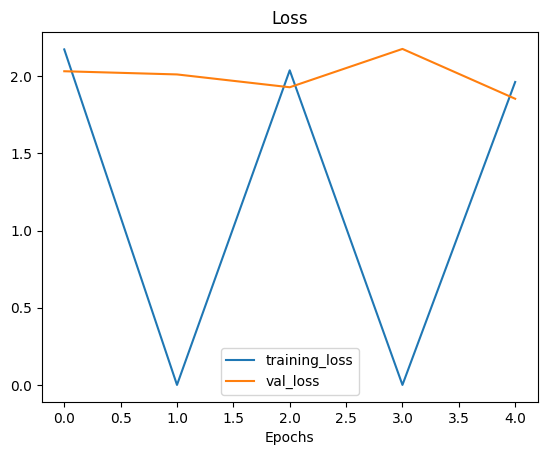

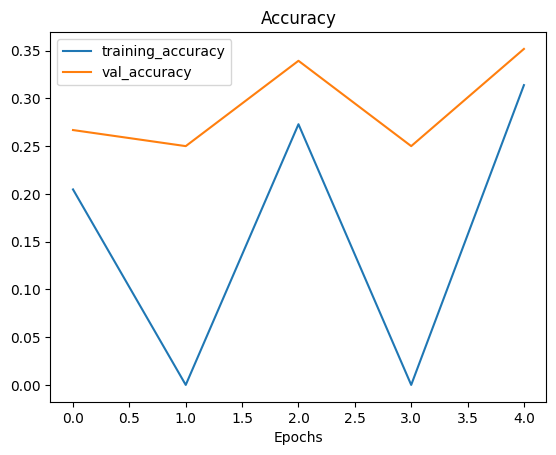

In [92]:
plot_loss_curve(history10)

In [93]:
model10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.3289 - loss: 1.8966


[1.852990984916687, 0.352400004863739]

In [95]:
model8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - accuracy: 0.2900 - loss: 3.4904


[3.5684399604797363, 0.28760001063346863]

### 7. Repeat until satisfied

We could keep going here

**How??**
* By running lots of experiments..
* By adjusting learning rate
* Try different methods of data augmentations
* Training for longer
* Try `Transfer learning`

### Making prediction with our model on custom images

In [97]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [109]:
# Make prediction using model 10
def pred_plot_multiclass(model, file, class_names = class_names):
    item = result(file, model)
    item_batched = tf.expand_dims(item, axis=0)
    predictions = model.predict(item_batched)
    if len(predictions[0])>1:
        pred_class = class_names[tf.argmax(predictions[0])]
    else:
        pred_class = class_names[int(tf.round(predictions).numpy())]
        
    plt.imshow(item)
    plt.title('The image contains: '+pred_class)
    plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


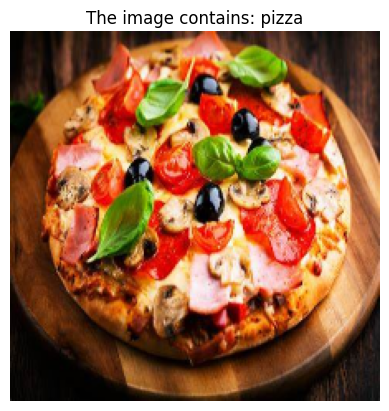

In [117]:
pred_plot_multiclass(model10, 'test_images/01_pizza.jpeg', (class_names))

## Save and load our model

In [123]:
model10.save("saved_model_10.keras")

In [124]:
loaded_model10 = tf.keras.models.load_model('saved_model_10.keras')

In [125]:
loaded_model10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.3560 - loss: 1.8664


[1.8529908657073975, 0.352400004863739]

In [126]:
# Comparing original and loaded
model10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step - accuracy: 0.3611 - loss: 1.8285


[1.8529906272888184, 0.352400004863739]